# Hodgkin Huxley neuron

Simple Hodgkin-Huxley neuron.

ANNarchy 4.6 (4.6.7b) on linux (posix). 


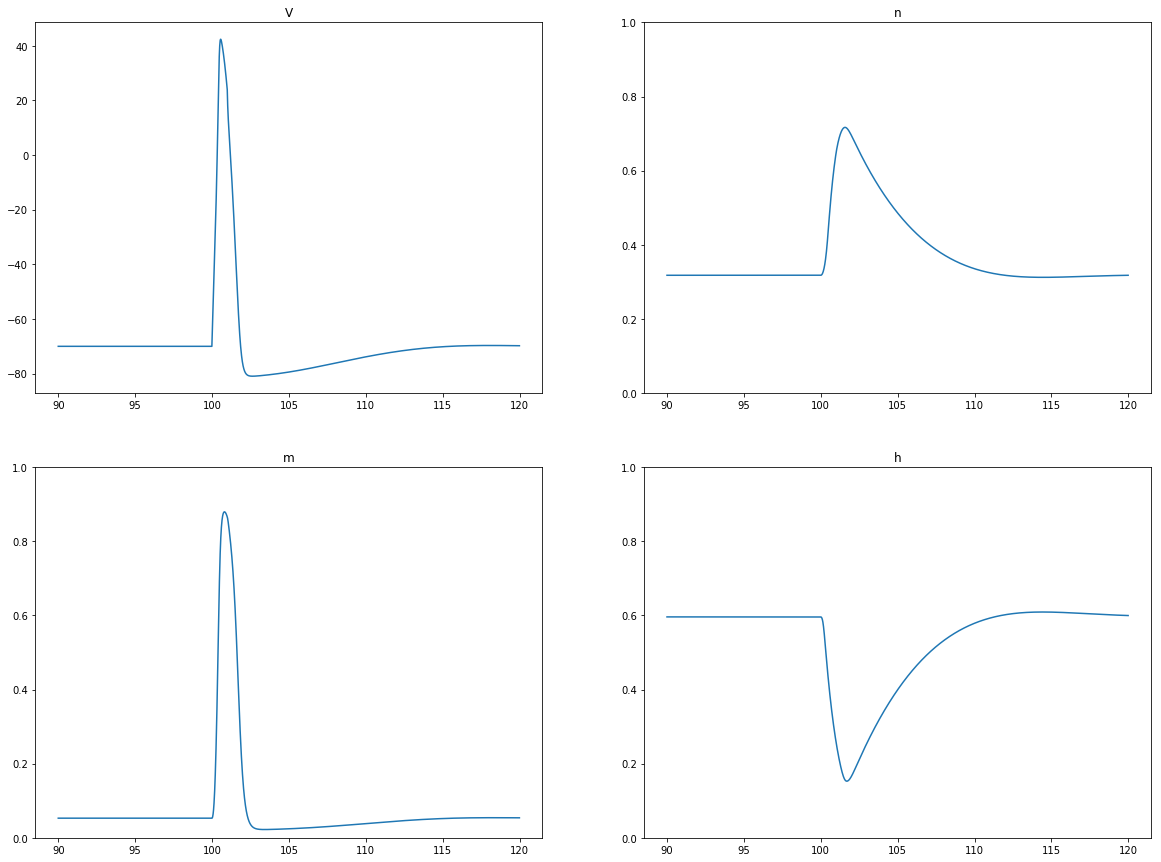

In [1]:
from ANNarchy import *
clear()

dt=0.01
setup(dt=dt)

HH = Neuron(

    parameters = """
    C = 1.0 # Capacitance
    VL = -59.387 # Leak voltage
    VK = -82.0 # Potassium reversal voltage
    VNa = 45.0 # Sodium reveral voltage
    gK = 36.0 # Maximal Potassium conductance
    gNa = 120.0 # Maximal Sodium conductance
    gL = 0.3 # Leak conductance
    vt = 30.0 # Threshold for spike emission
    I = 0.0 # External current
    """,

    equations = """
    # Previous membrane potential
    prev_V = V

    # Voltage-dependency parameters
    an = 0.01 * (V + 60.0) / (1.0 - exp(-0.1* (V + 60.0) ) )
    am = 0.1 * (V + 45.0) / (1.0 - exp (- 0.1 * ( V + 45.0 )))
    ah = 0.07 * exp(- 0.05 * ( V + 70.0 ))

    bn = 0.125 * exp (- 0.0125 * (V + 70.0))
    bm = 4.0 *  exp (- (V + 70.0) / 80.0)
    bh = 1.0/(1.0 + exp (- 0.1 * ( V + 40.0 )) )

    # Alpha/Beta functions
    dn/dt = an * (1.0 - n) - bn * n : init = 0.3, midpoint
    dm/dt = am * (1.0 - m) - bm * m : init = 0.0, midpoint
    dh/dt = ah * (1.0 - h) - bh * h : init = 0.6, midpoint

    # Membrane equation
    C * dV/dt = gL * (VL - V ) + gK * n**4 * (VK - V) + gNa * m**3 * h * (VNa - V) + I : midpoint

    """,

    spike = """
    # Spike is emitted when the membrane potential crosses the threshold from below
    (V > vt) and (prev_V <= vt)    
    """,

    reset = """
    # Nothing to do, it is built-in...
    """
)

pop = Population(neuron=HH, geometry=1)
pop.V = -50.0

compile()

m = Monitor(pop, ['spike', 'V', 'n', 'm', 'h'])

# Preparation
simulate(100.0)
# Current impulse for 1 ms
pop.I = 200.0
simulate(1.0)
# Reset
pop.I = 0.0
simulate(100.0)

data = m.get()

tstart = int(90.0/dt)
tstop  = int(120.0/dt)

% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)

plt.subplot(2,2,1)
plt.plot(90.0 + dt*np.arange(tstop-tstart), data['V'][tstart:tstop, 0])
plt.title('V')
plt.subplot(2,2,2)
plt.plot(90.0 + dt*np.arange(tstop-tstart), data['n'][tstart:tstop, 0])
plt.title('n')
plt.ylim((0.0, 1.0))
plt.subplot(2,2,3)
plt.plot(90.0 + dt*np.arange(tstop-tstart), data['m'][tstart:tstop, 0])
plt.title('m')
plt.ylim((0.0, 1.0))
plt.subplot(2,2,4)
plt.plot(90.0 + dt*np.arange(tstop-tstart), data['h'][tstart:tstop, 0])
plt.title('h')
plt.ylim((0.0, 1.0))
plt.show()